In [79]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [80]:
# Load target trajectory
q = np.load("Data/target_1.npy")  
q = q.T
T = q.shape[0]


In [81]:
# Define optimization variables
x = cp.Variable((T, 4))
u = cp.Variable((T-1, 2))  

# Store results
TE_list = []
CE_list = []
trajectories = []

In [82]:
# Values of rho
rhos = [10, 5, 2, 1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002]

# Define A, B, E matrices
A = np.array([
    [1, 0, 0.1, 0],
    [0, 1, 0, 0.1], 
    [0, 0, 0.8, 0],
    [0, 0, 0, 0.8]
    ])

B = np.array([
    [0, 0],
    [0, 0],
    [0.1, 0],
    [0, 0.1]
    ])

E = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0]
    ])

# Define x_initial vector
x_initial = np.array([0.5, 0, 1, -1])


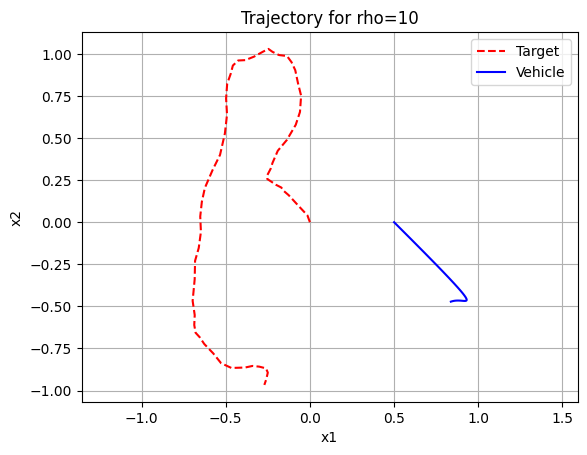

rho=10 | TE=88.8402 | CE=0.2753


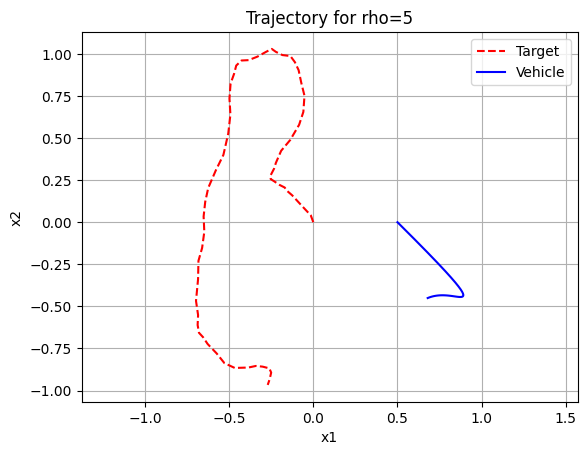

rho=5 | TE=83.5564 | CE=1.0654


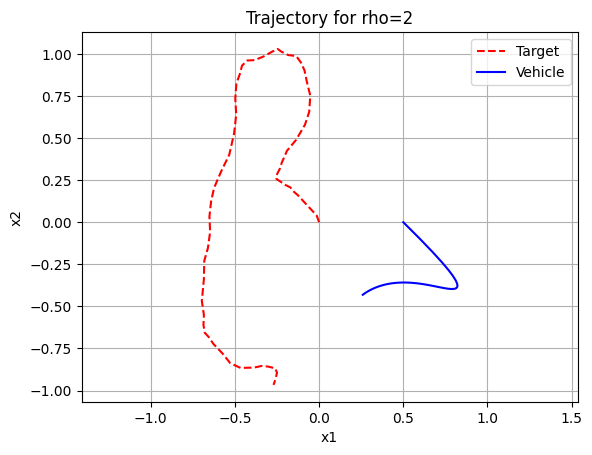

rho=2 | TE=69.8416 | CE=5.7748


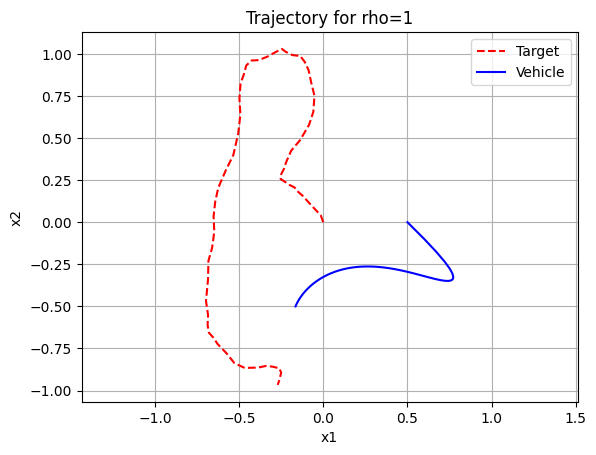

rho=1 | TE=55.7471 | CE=15.9147


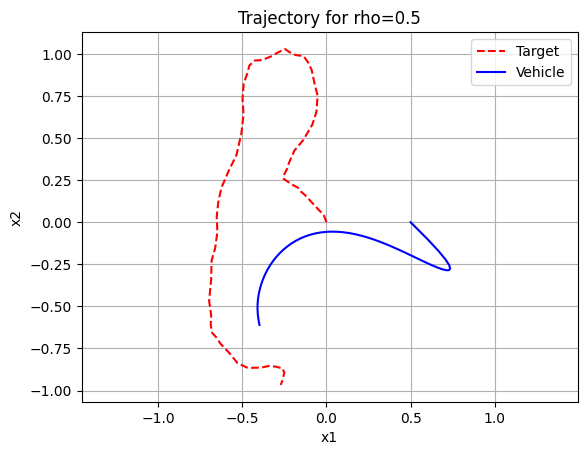

rho=0.5 | TE=43.3994 | CE=33.6793


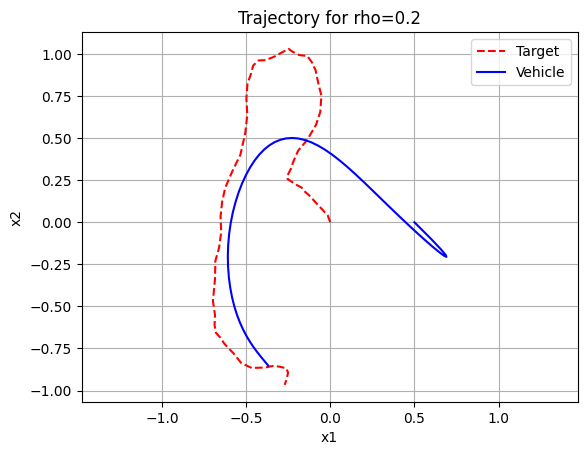

rho=0.2 | TE=23.7314 | CE=99.6487


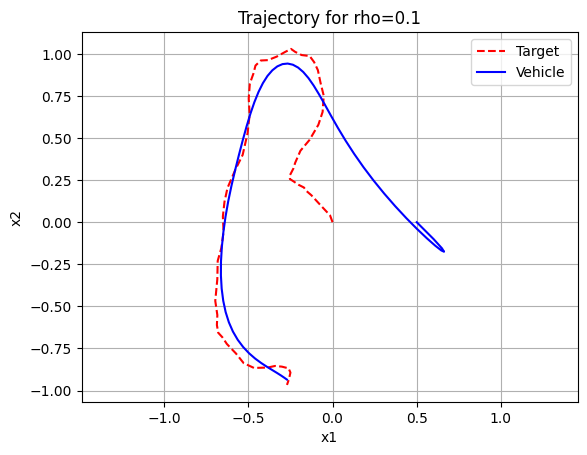

rho=0.1 | TE=12.0040 | CE=179.3761


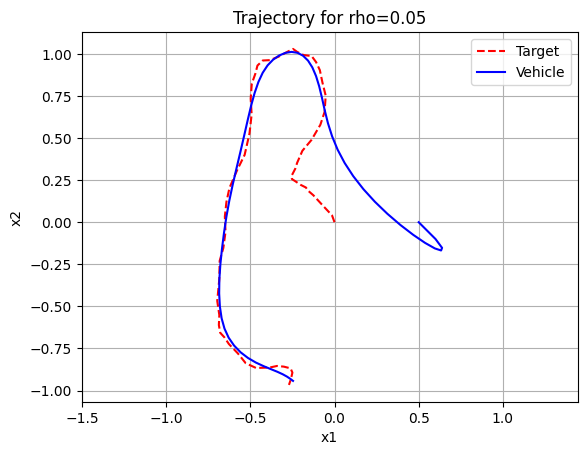

rho=0.05 | TE=9.2438 | CE=216.8552


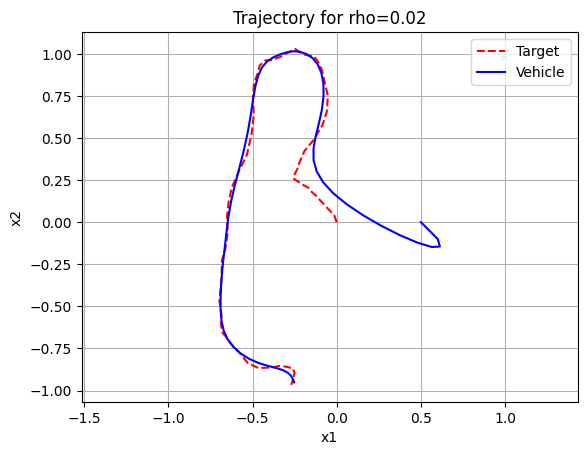

rho=0.02 | TE=6.4519 | CE=310.1299


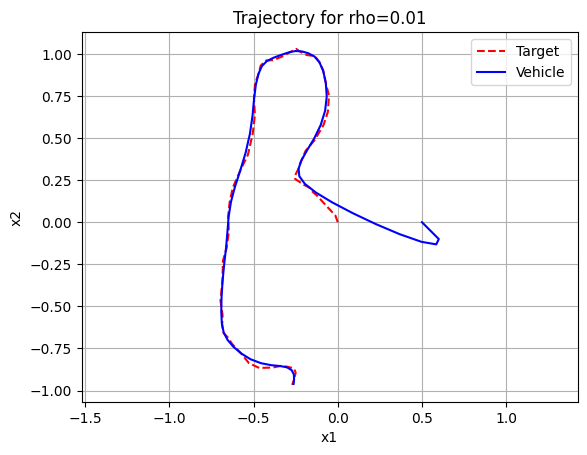

rho=0.01 | TE=4.5345 | CE=441.7985


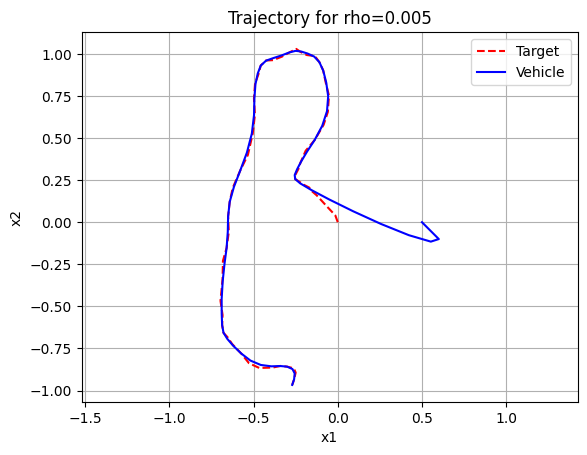

rho=0.005 | TE=3.4443 | CE=594.6549


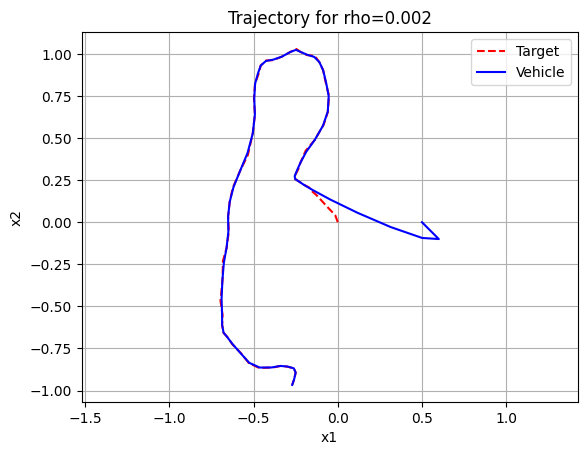

rho=0.002 | TE=2.5982 | CE=860.2567


In [87]:
TE_list = []
CE_list = []
trajectories = []

for rho in rhos:
    # Variables
    x = cp.Variable((T, 4))  # State variable
    u = cp.Variable((T-1, 2))  # Control variable

    # Constraints
    constraints = [x[0, :] == x_initial]
    for t in range(T-1):
        constraints += [x[t+1, :] == A @ x[t, :] + B @ u[t, :]]

    # Objective
    TE = cp.sum([cp.norm(E @ x[t, :].T - q[t, :].T, 2) for t in range(T)])
    CE = cp.norm(u, "fro")**2
    objective = cp.Minimize(TE + rho * CE)

    # Solve problem
    problem = cp.Problem(objective, constraints)
    problem.solve()

    # Extract results
    x_val = x.value
    u_val = u.value

    TE_list.append(TE.value)
    CE_list.append(CE.value)
    trajectories.append(x_val)

    # Plot trajectory vs target
    plt.figure()
    plt.plot(q[:, 0], q[:, 1], 'r--', label='Target')
    traj = E @ x_val.T  # shape (2, T)
    plt.plot(traj[0, :], traj[1, :], 'b-', label='Vehicle')
    plt.title(f"Trajectory for rho={rho}")
    plt.legend()
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.axis("equal")
    plt.grid(True)
    plt.show()

    print(f"rho={rho} | TE={TE.value:.4f} | CE={CE.value:.4f}")


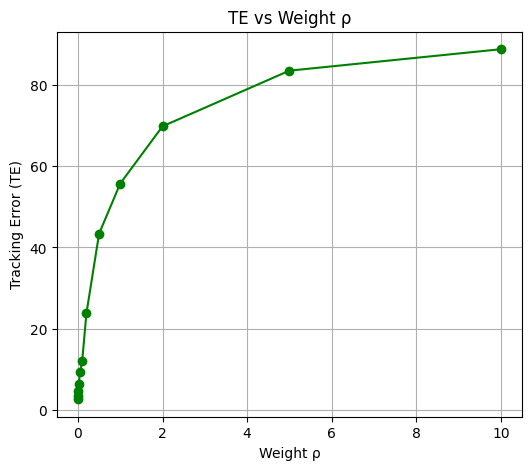

In [84]:
plt.figure(figsize=(6,5))
plt.plot(rhos, TE_list, 'o-', color='green', markersize=6)  # use rhos, not rho
plt.xlabel("Weight ρ")
plt.ylabel("Tracking Error (TE)")
plt.title("TE vs Weight ρ")
plt.grid(True)
plt.show()

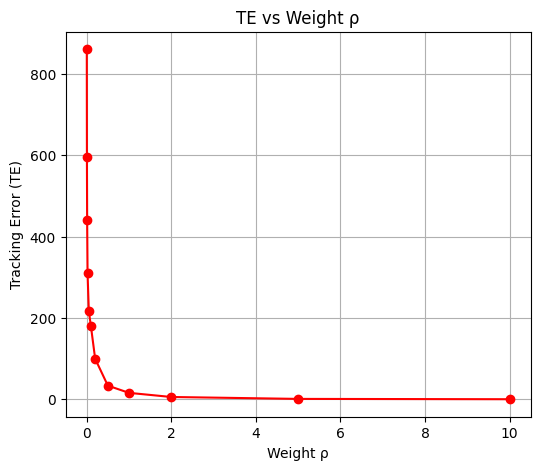

In [85]:
plt.figure(figsize=(6,5))
plt.plot(rhos, CE_list, 'o-', color='red', markersize=6)  # use rhos, not rho
plt.xlabel("Weight ρ")
plt.ylabel("Tracking Error (TE)")
plt.title("TE vs Weight ρ")
plt.grid(True)
plt.show()


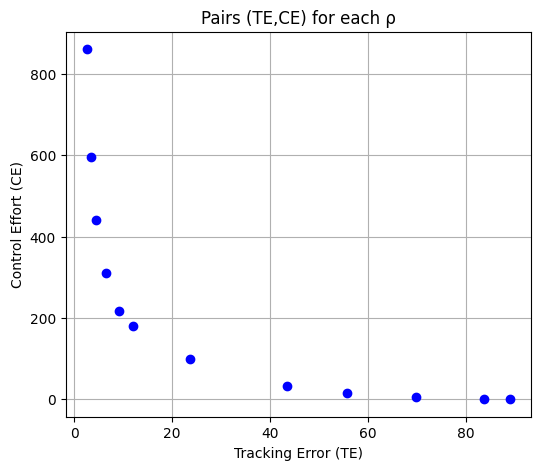

In [86]:
plt.figure(figsize=(6,5))
plt.plot(TE_list, CE_list, 'o', color='blue', markersize=6)
plt.xlabel("Tracking Error (TE)")
plt.ylabel("Control Effort (CE)")
plt.title("Pairs (TE,CE) for each ρ")
plt.grid(True)
plt.show()